In [1]:
# const
DATA_DIRECTORY = "./Vegetable Images"
TEST_DATA_PATH = DATA_DIRECTORY + "/test"
TRAIN_DATA_PATH = DATA_DIRECTORY + "/train"
VALID_DATA_PATH = DATA_DIRECTORY + "/validation"

IMG_SIZE = (224, 224)

In [2]:
# inspect the extracted data 
import os 
for root, dirs, files in os.walk(DATA_DIRECTORY):
    print(f"There are {len(dirs)} directories and {len(files)} files in {root}")

There are 3 directories and 0 files in ./Vegetable Images
There are 15 directories and 0 files in ./Vegetable Images\test
There are 0 directories and 200 files in ./Vegetable Images\test\Bean
There are 0 directories and 200 files in ./Vegetable Images\test\Bitter_Gourd
There are 0 directories and 200 files in ./Vegetable Images\test\Bottle_Gourd
There are 0 directories and 200 files in ./Vegetable Images\test\Brinjal
There are 0 directories and 200 files in ./Vegetable Images\test\Broccoli
There are 0 directories and 200 files in ./Vegetable Images\test\Cabbage
There are 0 directories and 200 files in ./Vegetable Images\test\Capsicum
There are 0 directories and 200 files in ./Vegetable Images\test\Carrot
There are 0 directories and 200 files in ./Vegetable Images\test\Cauliflower
There are 0 directories and 200 files in ./Vegetable Images\test\Cucumber
There are 0 directories and 200 files in ./Vegetable Images\test\Papaya
There are 0 directories and 200 files in ./Vegetable Images\tes

In [3]:
# inspect extracted data to calcualte classes
import numpy as np

class_names = []
test_data_classes_sum = 0
for entry in os.scandir(TEST_DATA_PATH):
    if entry.is_dir():
        class_names.append(entry.name)
        test_data_classes_sum += 1

class_names = np.array(class_names) # it is not efficient due numpy docs t ouse append on np.array() because it is overwritting itself each time

train_data_classes = sum(1 for entry in os.scandir(TRAIN_DATA_PATH) if entry.is_dir())
validation_data_classes = sum(1 for entry in os.scandir(VALID_DATA_PATH) if entry.is_dir())

if (test_data_classes_sum == train_data_classes == validation_data_classes):
    print(f"There are {test_data_classes_sum} classes in dataset")
    print(class_names)
else:
    print("There is different amount of directories in at least one of the subdirectories !!!")

There are 15 classes in dataset
['Bean' 'Bitter_Gourd' 'Bottle_Gourd' 'Brinjal' 'Broccoli' 'Cabbage'
 'Capsicum' 'Carrot' 'Cauliflower' 'Cucumber' 'Papaya' 'Potato' 'Pumpkin'
 'Radish' 'Tomato']


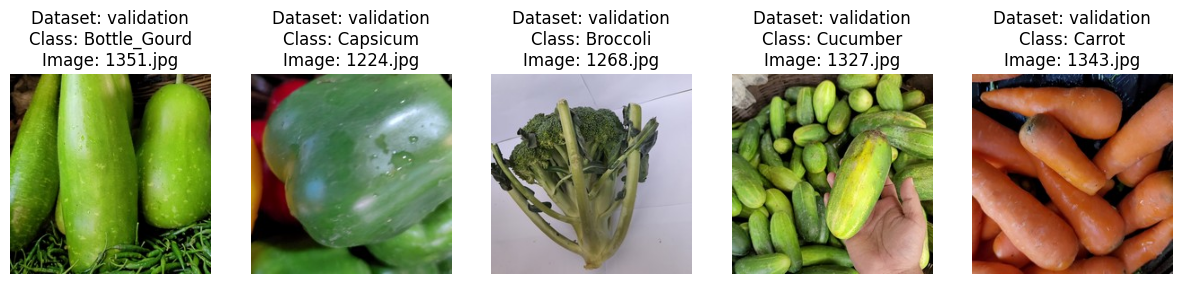

In [36]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def print_random_images_from_root(num_images=5):
    '''Print random images of random classes from the root directory of the dataset'''
    image_from_directory = random.choice([TEST_DATA_PATH, TRAIN_DATA_PATH, VALID_DATA_PATH])

    fig, axes = plt.subplots(1, num_images, figsize=(15, 3))

    for i in range(num_images):
        # get the list of subdirectories of the chosen directory
        subdirectory_paths = [entry.path for entry in os.scandir(image_from_directory) if entry.is_dir()]

        # get one random subdirectory
        random_subdirectory = random.choice(subdirectory_paths)

        # get all the images from the chosen subdirectory
        jpg_files = [entry.path for entry in os.scandir(random_subdirectory) if entry.is_file and entry.name.lower().endswith(".jpg")]

        # select a random image
        random_image_path = random.choice(jpg_files)

        img = mpimg.imread(random_image_path)

        # extract the names
        dataset_name = os.path.basename(image_from_directory)
        class_name = os.path.basename(random_subdirectory)
        image_name = os.path.basename(random_image_path)

        # plot the image on the corresponding subplot
        axes[i].imshow(img)
        axes[i].set_title(f"Dataset: {dataset_name}\nClass: {class_name}\nImage: {image_name}")
        axes[i].axis('off')

    plt.show()

# Print 5 random images next to each other with names
print_random_images_from_root(num_images=5)

In [5]:
# preprocess data - rescale
from tensorflow.keras.preprocessing.image import ImageDataGenerator

data_generator = ImageDataGenerator(rescale=1/255.) # max pixel value 255

# turn data from directories into batches of 32
train_data = data_generator.flow_from_directory(TRAIN_DATA_PATH, batch_size=32, target_size=IMG_SIZE, class_mode="categorical")
valid_data = data_generator.flow_from_directory(VALID_DATA_PATH, batch_size=32, target_size=IMG_SIZE, class_mode="categorical")
test_data = data_generator.flow_from_directory(TEST_DATA_PATH, batch_size=32, target_size=IMG_SIZE, class_mode="categorical")

Found 15000 images belonging to 15 classes.
Found 3000 images belonging to 15 classes.
Found 3000 images belonging to 15 classes.


In [6]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Flatten, Dense, MaxPool2D
from tensorflow.keras.optimizers import Adam

baseline_model = Sequential([
    Conv2D(10, 3, input_shape=(224, 224, 3), activation="relu"),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Conv2D(10, 3, activation="relu"),
    Conv2D(10, 3, activation="relu"),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(15, activation="softmax")
])

# compile the model
baseline_model.compile(loss="categorical_crossentropy", optimizer=Adam(), metrics=["accuracy"])

In [7]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [8]:
# fit the model

baseline_model_history = baseline_model.fit(train_data, epochs=5, steps_per_epoch=len(train_data), validation_data=test_data, validation_steps=len(test_data))

Epoch 1/5
469/469 [==============================] - 74s 147ms/step - loss: 1.3614 - accuracy: 0.5485 - val_loss: 0.8729 - val_accuracy: 0.7050
Epoch 2/5
469/469 [==============================] - 15s 32ms/step - loss: 0.6267 - accuracy: 0.7995 - val_loss: 0.6249 - val_accuracy: 0.7970
Epoch 3/5
469/469 [==============================] - 15s 32ms/step - loss: 0.3699 - accuracy: 0.8821 - val_loss: 0.4969 - val_accuracy: 0.8507
Epoch 4/5
469/469 [==============================] - 15s 32ms/step - loss: 0.2229 - accuracy: 0.9309 - val_loss: 0.5906 - val_accuracy: 0.8373
Epoch 5/5
469/469 [==============================] - 16s 33ms/step - loss: 0.1532 - accuracy: 0.9523 - val_loss: 0.6804 - val_accuracy: 0.8113


In [9]:
baseline_model.evaluate(valid_data)

94/94 [==============================] - 11s 117ms/step - loss: 0.7259 - accuracy: 0.8097


[0.7258628606796265, 0.8096666932106018]

In [18]:
def plot_histories(histories, model_names):
    plt.figure(figsize=(12, 6))

    for i, history in enumerate(histories):
        loss = history.history["loss"]
        accuracy = history.history["accuracy"]
        val_loss = history.history["val_loss"]
        val_accuracy = history.history["val_accuracy"]

        num_of_epochs = range(len(loss))

        plt.subplot(1, 2, 1)
        plt.plot(num_of_epochs, loss, label=f"{model_names[i]} - train_loss")
        plt.plot(num_of_epochs, val_loss, label=f"{model_names[i]} - val_loss")
        plt.title("Loss")
        plt.xlabel("Epoch")
        plt.ylabel("Loss")
        plt.legend()

        plt.subplot(1, 2, 2)
        plt.plot(num_of_epochs, accuracy, label=f"{model_names[i]} - train_accuracy")
        plt.plot(num_of_epochs, val_accuracy, label=f"{model_names[i]} - val_accuracy")
        plt.title("Accuracy")
        plt.xlabel("Epoch")
        plt.ylabel("Accuracy")
        plt.legend()

    plt.tight_layout()
    plt.show()


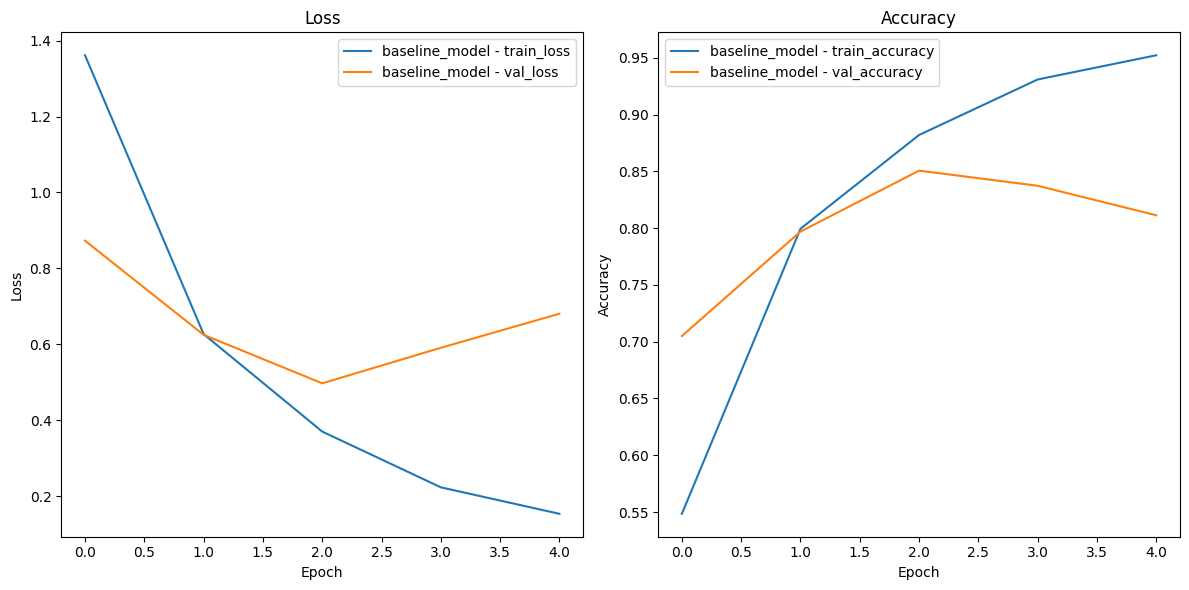

In [19]:
plot_histories(histories=[baseline_model_history], model_names=["baseline_model"])

In [12]:
# save baseline_model
baseline_model.save("baseline_model")

INFO:tensorflow:Assets written to: baseline_model\assets


INFO:tensorflow:Assets written to: baseline_model\assets


In [13]:
# modify architecture of the model to look for improvements
model_1 = Sequential([
    Conv2D(10, 3, input_shape=(224, 224, 3), activation="relu"),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(15, activation="softmax")
])

model_1.compile(loss="categorical_crossentropy", optimizer=Adam(), metrics=["accuracy"])

In [24]:
baseline_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 10)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 conv2d_4 (Conv2D)           (None, 104, 104, 10)      910       
                                                        

In [14]:
model_1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 conv2d_6 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 110, 110, 10)     0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 54, 54, 10)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 29160)            

In [15]:
model_1_history = model_1.fit(train_data, epochs=5, steps_per_epoch=len(train_data), validation_data=test_data, validation_steps=len(test_data))

Epoch 1/5
469/469 [==============================] - 16s 33ms/step - loss: 1.0701 - accuracy: 0.6573 - val_loss: 0.6414 - val_accuracy: 0.7890
Epoch 2/5
469/469 [==============================] - 15s 32ms/step - loss: 0.4487 - accuracy: 0.8615 - val_loss: 0.5783 - val_accuracy: 0.8170
Epoch 3/5
469/469 [==============================] - 16s 34ms/step - loss: 0.2659 - accuracy: 0.9212 - val_loss: 0.4528 - val_accuracy: 0.8673
Epoch 4/5
469/469 [==============================] - 15s 33ms/step - loss: 0.1372 - accuracy: 0.9579 - val_loss: 0.4743 - val_accuracy: 0.8673
Epoch 5/5
469/469 [==============================] - 16s 34ms/step - loss: 0.1037 - accuracy: 0.9683 - val_loss: 0.4774 - val_accuracy: 0.8830


In [23]:
model_1.evaluate(valid_data)

94/94 [==============================] - 3s 27ms/step - loss: 0.4605 - accuracy: 0.8820


[0.4605131447315216, 0.8820000290870667]

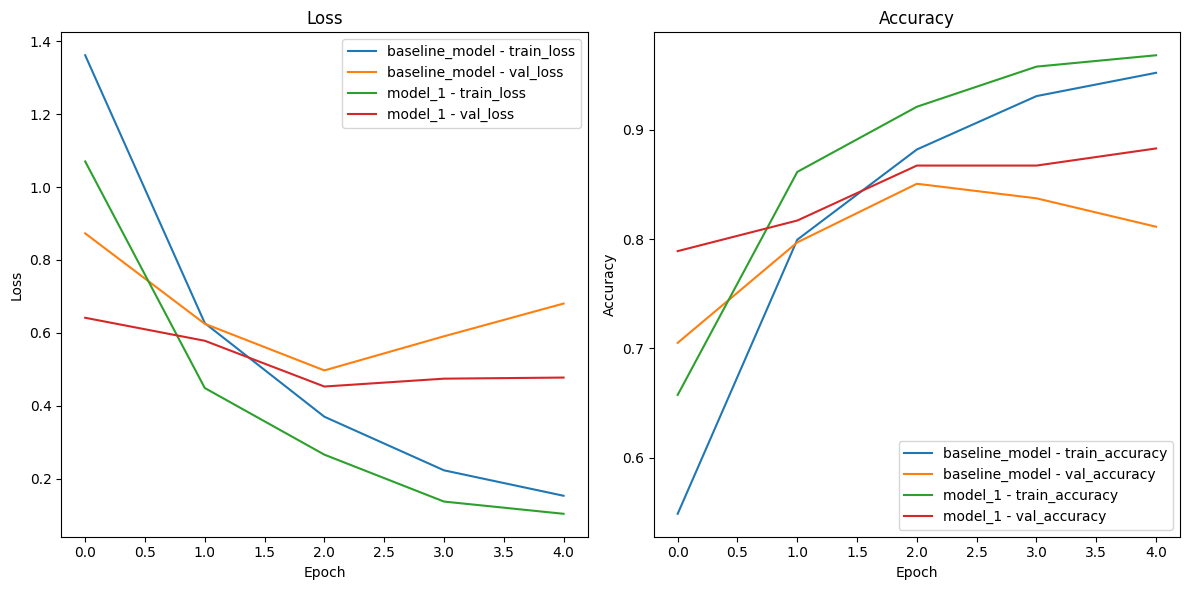

In [21]:
plot_histories(histories=[baseline_model_history, model_1_history], model_names=["baseline_model", "model_1"]) # model_1 works better than the baseline_model

In [26]:
from tensorflow.keras.layers import MaxPooling2D

model_3 = Sequential([
    Conv2D(16, 3, input_shape=(224, 224, 3), activation="relu"),
    MaxPooling2D(),
    Conv2D(32, 3, activation="tanh"),  # Tanh activation
    MaxPooling2D(),
    Conv2D(64, 3, activation="elu"),   # Exponential Linear Unit (ELU) activation
    MaxPooling2D(),
    Flatten(),
    Dense(128, activation="relu"),
    Dense(15, activation="softmax")
])

model_3.compile(loss="categorical_crossentropy", optimizer=Adam(), metrics=["accuracy"])

In [27]:
model_3.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_11 (Conv2D)          (None, 222, 222, 16)      448       
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 111, 111, 16)     0         
 2D)                                                             
                                                                 
 conv2d_12 (Conv2D)          (None, 109, 109, 32)      4640      
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 54, 54, 32)       0         
 2D)                                                             
                                                                 
 conv2d_13 (Conv2D)          (None, 52, 52, 64)        18496     
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 26, 26, 64)      

In [29]:
model_3_history = model_3.fit(train_data, epochs=7, steps_per_epoch=len(train_data), validation_data=test_data, validation_steps=len(test_data))

Epoch 1/7
469/469 [==============================] - 15s 33ms/step - loss: 0.4835 - accuracy: 0.8491 - val_loss: 0.3499 - val_accuracy: 0.8920
Epoch 2/7
469/469 [==============================] - 15s 32ms/step - loss: 0.2007 - accuracy: 0.9370 - val_loss: 0.3061 - val_accuracy: 0.9100
Epoch 3/7
469/469 [==============================] - 15s 32ms/step - loss: 0.1239 - accuracy: 0.9611 - val_loss: 0.3685 - val_accuracy: 0.9067
Epoch 4/7
469/469 [==============================] - 15s 32ms/step - loss: 0.1201 - accuracy: 0.9605 - val_loss: 0.5146 - val_accuracy: 0.8720
Epoch 5/7
469/469 [==============================] - 15s 32ms/step - loss: 0.1157 - accuracy: 0.9651 - val_loss: 0.3840 - val_accuracy: 0.9147
Epoch 6/7
469/469 [==============================] - 15s 32ms/step - loss: 0.0828 - accuracy: 0.9748 - val_loss: 0.4468 - val_accuracy: 0.9100
Epoch 7/7
469/469 [==============================] - 15s 32ms/step - loss: 0.1240 - accuracy: 0.9669 - val_loss: 0.4458 - val_accuracy: 0.9170

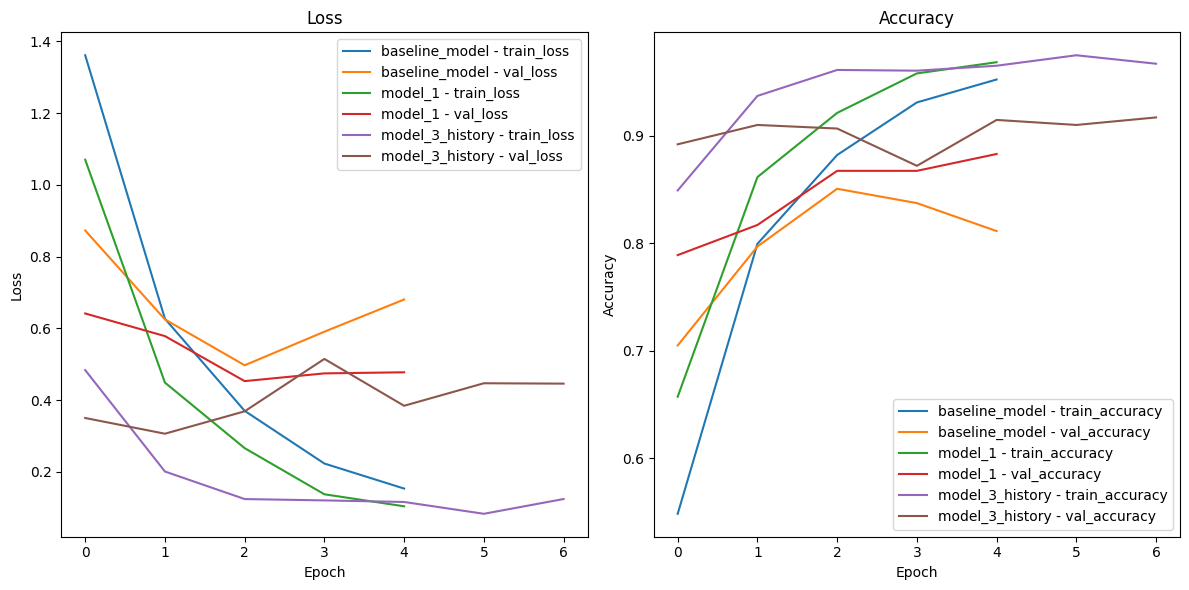

In [30]:
plot_histories(histories=[baseline_model_history, model_1_history, model_3_history], model_names=["baseline_model", "model_1", "model_3_history"]) # the third model (model_3) has the best stats, but looking on the last epoch it might have potential to start overfitting in later epochs